In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib. pyplot as plt
%matplotlib inline

2023-11-01 10:29:10.861144: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 10:29:12.887038: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 10:29:12.891700: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-01 10:29:17.408565: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Not usign GPU :(

In [4]:
mobile = tf.keras.applications.mobilenet.MobileNet()

2023-11-01 10:29:29.791202: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-01 10:29:29.791991: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
def prepare_image(file):
    img_path = '/home/ggraeff/Documents/Keras/free_code_camp/data/MoboleNet-samples/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

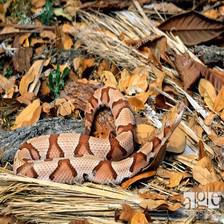

In [6]:
from IPython.display import Image
Image(filename='/home/ggraeff/Documents/Keras/free_code_camp/data/MoboleNet-samples/12.jpg', width=300, height=200)

In [7]:
preprocessed_image = prepare_image('12.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 1s 796ms/step


[[('n01740131', 'night_snake', 0.344262),
  ('n01753488', 'horned_viper', 0.27073538),
  ('n01756291', 'sidewinder', 0.1210538),
  ('n01729322', 'hognose_snake', 0.07165835),
  ('n01728572', 'thunder_snake', 0.06677121)]]

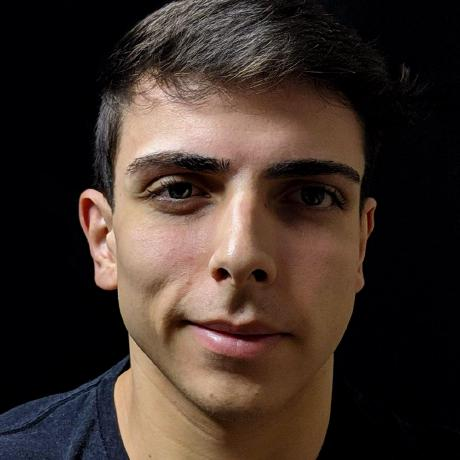

In [8]:
from IPython.display import Image
Image(filename='/home/ggraeff/Documents/Keras/free_code_camp/data/MoboleNet-samples/1212.jpeg', width=300, height=200)

In [9]:
preprocessed_image = prepare_image('1212.jpeg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 24ms/step


[[('n02786058', 'Band_Aid', 0.17026833),
  ('n03676483', 'lipstick', 0.06206136),
  ('n04350905', 'suit', 0.059855398),
  ('n03838899', 'oboe', 0.04574298),
  ('n02883205', 'bow_tie', 0.04045396)]]

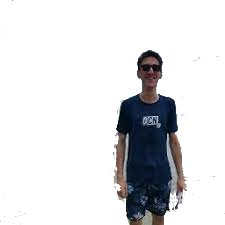

In [10]:
from IPython.display import Image
Image(filename='/home/ggraeff/Documents/Keras/free_code_camp/data/MoboleNet-samples/lipe.jpeg', width=300, height=200)

In [11]:
preprocessed_image = prepare_image('lipe.jpeg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 27ms/step


[[('n02916936', 'bulletproof_vest', 0.33457848),
  ('n03595614', 'jersey', 0.111512065),
  ('n03594734', 'jean', 0.06499038),
  ('n02641379', 'gar', 0.042661257),
  ('n03888605', 'parallel_bars', 0.03591698)]]

Start the sign language thing:

In [12]:
os.chdir('/home/ggraeff/Documents/Keras/free_code_camp/data/sign-language')
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')
    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os .mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')
        
        valid_samples = random. sample(os. listdir(f'train/{i}'), 70)
        for j in valid_samples: 
            shutil.move(f'train/{i}/{j}', f'valid/{i}')
        
        test_samples = random. sample(os.listdir(f'train/{i}'), 12)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os. chdir('../..')

In [13]:
train_path = '/home/ggraeff/Documents/Keras/free_code_camp/data/sign-language/train'
valid_path = '/home/ggraeff/Documents/Keras/free_code_camp/data/sign-language/valid'
test_path = '/home/ggraeff/Documents/Keras/free_code_camp/data/sign-language/test'

In [39]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 4180 images belonging to 10 classes.
Found 700 images belonging to 10 classes.
Found 120 images belonging to 10 classes.


In [15]:
train_batches.allowed_class_modes

{None, 'binary', 'categorical', 'input', 'sparse'}

In [16]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [17]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [18]:
x = mobile.layers[-1].output
output = Dense(units=10, activation='softmax')(x)

In [19]:
model = Model(inputs=mobile.input, outputs=output)

In [20]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

# compiling and training the model

In [22]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/30
418/418 - 81s - loss: 2.1426 - accuracy: 0.8950 - val_loss: 2.1179 - val_accuracy: 0.8829 - 81s/epoch - 193ms/step
Epoch 2/30
418/418 - 82s - loss: 2.0868 - accuracy: 0.8995 - val_loss: 2.0595 - val_accuracy: 0.9014 - 82s/epoch - 196ms/step
Epoch 3/30
418/418 - 81s - loss: 2.0348 - accuracy: 0.8945 - val_loss: 2.0088 - val_accuracy: 0.9000 - 81s/epoch - 193ms/step
Epoch 4/30
418/418 - 68s - loss: 1.9838 - accuracy: 0.8923 - val_loss: 1.9572 - val_accuracy: 0.8986 - 68s/epoch - 163ms/step
Epoch 5/30
418/418 - 66s - loss: 1.9328 - accuracy: 0.8964 - val_loss: 1.9068 - val_accuracy: 0.9000 - 66s/epoch - 158ms/step
Epoch 6/30
418/418 - 63s - loss: 1.8832 - accuracy: 0.8952 - val_loss: 1.8758 - val_accuracy: 0.8729 - 63s/epoch - 152ms/step
Epoch 7/30
418/418 - 63s - loss: 1.8354 - accuracy: 0.8947 - val_loss: 1.8117 - val_accuracy: 0.9000 - 63s/epoch - 151ms/step
Epoch 8/30
418/418 - 65s - loss: 1.7867 - accuracy: 0.8967 - val_loss: 1.7658 - val_accuracy: 0.8971 - 65s/epoch - 156

In [37]:
def plot_confusion_matrix(cm, 
                          classes, 
                          normalize=False, 
                          title='Confusion matrix', 
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') /cm.sum(axis=1)[:, np.newaxis]
        print("Normalizes confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [40]:
test_labels = test_batches.classes

In [41]:
predictions = model.predict(x=test_batches, verbose=0)

In [42]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [43]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[12  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0 12  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0 12]]


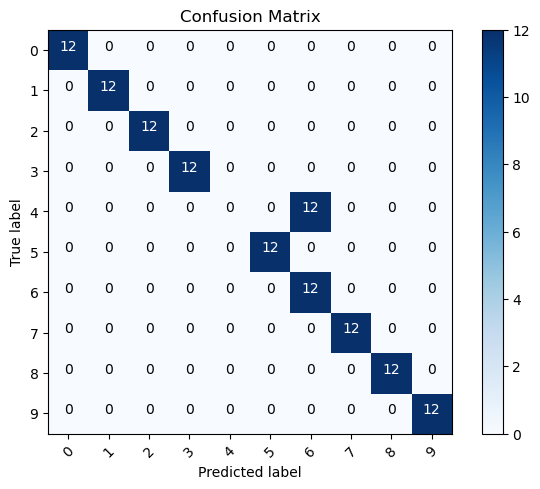

In [46]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')